In [1]:
import pandas as pd
import numpy as np
# Load local .csv file as DataFrame
df = pd.read_csv('jpm_merge.csv')
# Inspect the data
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-05-24 14:30:00-04:00,125.870003,126.010002,125.860001,125.959999,125.959999,0
1,2022-05-24 14:31:00-04:00,125.949997,125.970001,125.839996,125.930000,125.930000,21033
2,2022-05-24 14:32:00-04:00,125.930000,126.059898,125.930000,126.050003,126.050003,21146
3,2022-05-24 14:33:00-04:00,126.053001,126.099998,125.980003,126.099998,126.099998,28973
4,2022-05-24 14:34:00-04:00,126.099998,126.160004,126.059998,126.139999,126.139999,22300


In [2]:
df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

data_date = df.filter(['Date'])

data_date = data_date.values
# Get the number of rows to train the model on
training_data_date = int(np.ceil( len(data_date) * .95 ))

from sklearn.preprocessing import MinMaxScaler

#scaler1 = MinMaxScaler(feature_range=(0,1))
#scaled_data1 = scaler1.fit_transform(data_date)
# Create the training data set 
# Create the scaled training data set
train_data_date = data_date[0:int(training_data_date), :]

In [3]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))



In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.66179225, 0.66037722, 0.66603772, 0.668396  , 0.67028283,
       0.67043866, 0.6679242 , 0.67075463, 0.67594334, 0.68113204,
       0.67264146, 0.66556592, 0.66509412, 0.65990542, 0.65566031,
       0.65330167, 0.65518851, 0.65518851, 0.64858477, 0.64622613,
       0.64292426, 0.64528289, 0.64103742, 0.64032991, 0.63920745,
       0.63537728, 0.64009419, 0.64103742, 0.6443393 , 0.64528289,
       0.64764153, 0.649528  , 0.649528  , 0.66061294, 0.65896218,
       0.66650916, 0.66745276, 0.66320729, 0.66415089, 0.66367909,
       0.67028283, 0.66651384, 0.66226405, 0.65693391, 0.65707534,
       0.65518851, 0.66084901, 0.66084901, 0.66282546, 0.65943398,
       0.649528  , 0.65613175, 0.66084901, 0.66603772, 0.6679242 ,
       0.67071684, 0.68018845, 0.67920274, 0.67202823, 0.68018845])]
[0.682075281234896]

[array([0.66179225, 0.66037722, 0.66603772, 0.668396  , 0.67028283,
       0.67043866, 0.6679242 , 0.67075463, 0.67594334, 0.68113204,
       0.67264146, 0.66556592, 0.6650

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from numpy import array
import matplotlib.pyplot as plt

# Build the LSTM model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape= (x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, return_sequences=True, activation='relu' ))
model.add(LSTM(64, return_sequences=True, activation='relu' ))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
413/413 [==============================] - 14s 27ms/step - loss: 0.0057
Epoch 2/100
413/413 [==============================] - 12s 30ms/step - loss: 0.0011
Epoch 3/100
413/413 [==============================] - 16s 38ms/step - loss: 7.7044e-04
Epoch 4/100
413/413 [==============================] - 13s 31ms/step - loss: 6.4416e-04
Epoch 5/100
413/413 [==============================] - 13s 31ms/step - loss: 5.9528e-04
Epoch 6/100
413/413 [==============================] - 18s 43ms/step - loss: 4.3847e-04
Epoch 7/100
413/413 [==============================] - 21s 51ms/step - loss: 3.8081e-04
Epoch 8/100
413/413 [==============================] - 34s 82ms/step - loss: 3.0400e-04
Epoch 9/100
413/413 [==============================] - 30s 74ms/step - loss: 2.3707e-04
Epoch 10/100
413/413 [==============================] - 32s 78ms/step - loss: 2.5001e-04
Epoch 11/100
413/413 [==============================] - 31s 75ms/step - loss: 2.1198e-04
Epoch 12/100
413/413 [================

413/413 [==============================] - 37s 90ms/step - loss: 9.4935e-05
Epoch 93/100
413/413 [==============================] - 42s 102ms/step - loss: 8.8579e-05
Epoch 94/100
413/413 [==============================] - 38s 91ms/step - loss: 8.8150e-05
Epoch 95/100
413/413 [==============================] - 41s 100ms/step - loss: 9.7384e-05
Epoch 96/100
413/413 [==============================] - 39s 94ms/step - loss: 9.5369e-05
Epoch 97/100
413/413 [==============================] - 42s 101ms/step - loss: 9.2409e-05
Epoch 98/100
413/413 [==============================] - 36s 88ms/step - loss: 8.5959e-05
Epoch 99/100
413/413 [==============================] - 42s 101ms/step - loss: 8.8231e-05
Epoch 100/100
413/413 [==============================] - 33s 79ms/step - loss: 9.3078e-05


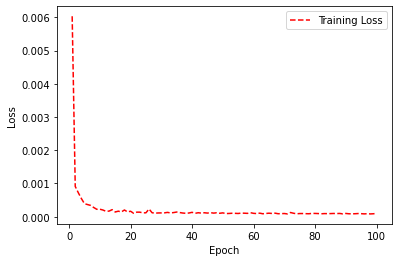

In [6]:

# Get training and test loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [11]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions3 = model.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions3 - y_test) ** 2)))
rmse

0.3373169451731466

In [12]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

train = data[:training_data_len]
valid_3 = data[training_data_len:]
valid_3['Predictions3'] = predictions3

mape(valid_3['Close'], valid_3['Predictions3']) 

<ipython-input-12-3f93792f6e59>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_3['Predictions3'] = predictions3


0.13196465774256477

In [13]:
valid_3['Predictions3']

6664    113.771782
6665    113.748894
6666    113.663429
6667    113.480820
6668    113.286736
           ...    
7009    115.493530
7010    115.439377
7011    115.435837
7012    115.498360
7013    115.501274
Name: Predictions3, Length: 350, dtype: float32